PHASE 3 PROJECT

Personal Context- I am currently a service account associate whose main KPI is customer retention and reducing churn. This informed my problem statement.

Business Understanding
Audience: Senior Managers at SyriaTel handling business development.

Business Problem: SyriaTel is losing revenue as customers move to competitors. 
It is significantly cheaper to retain an existing customer through incentives than to acquire a new one.

Goal: Build a predictive classification model to identify customers likely to churn. This will allow the retention team to intervene with targeted loyalty offers.


In [1]:
#importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data loading
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')


In [2]:
#checking the columnsto determine my target variable
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Checking the characteristics of the data I have.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
#checking the stats
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
# checking my target variable distribution
print(df['churn'].value_counts())


False    2850
True      483
Name: churn, dtype: int64


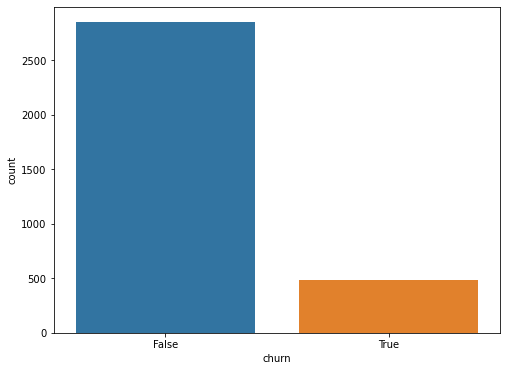

In [6]:
# create a visualization for churn distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='churn', data=df)

Choosing the primary metric-Recall
Based on the business problem we defined for the SyriaTel Retention Manager, I settled on Recall because the cost of a False Negative is high.

False Negative cost-High
If my model says a customer won't churn (False), but they actually do (True), SyriaTel loses that customer’s revenue and has to spend a lot of money to acquire a new one (refer above).

False positive cost-Low
If my model says a customer will churn (True), but they weren't going to (False), the only consequence is that SyriaTel might give a small discount or a phone call to a loyal customer—which actually grows brand loyalty/satisfaction anyway.

Note-
While Precision is important to ensure we aren't giving away discounts to everyone. For SyriaTel, Recall is the priority. 
It is far more detrimental to the company’s resources to lose a customer entirely (False Negative) than it is to accidentally offer a promotion to a customer who intended to stay (False Positive). This discount can have a small benefit (brand loyalty/saisfaction rate going up)

DATA PREPARATION AND COMPARING MACHINE LEARNING MODELS (LOGISTIC REGRESSION VS DECISION TREES)

In [7]:
#importing tools for a machine learning pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [8]:
""" Dropping phone number (unique ID) and define Features/Target
Reasons below:
1. Lack of Predictive Power (Generalization)
2. Avoid overfitting (phone numbers are all unique) 
3. High Dimensionality (One-Hot Encoding will lead to too many columns with no accuracy benefit) 
"""

X = df.drop(['phone number', 'churn'], axis=1)
y = df['churn']

In [9]:
# Performing Train-Test Split using an 80/20 ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ONE HOT ENCODING BELOW

In [10]:
"""Partitioning into categorical and numerical groups.
This distinction is vital because each type requires a different mathematical transformation to be usable by the model. 
Specifically, 'area code' was treated as a categorical variable despite being represented by integers, 
as it represents distinct regions rather than a continuous scale. 
This preparation ensures that our Logistic Regression model interprets geographic data as labels rather than magnitudes.
"""

cat_features = ['state', 'area code', 'international plan', 'voice mail plan']
num_features = [col for col in X.columns if col not in cat_features]

# Numerical features scaling using StandardScaler to normalize their influence,
#  and categorical features transforming via OneHotEncoder.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

In [11]:
#fitting a Logistic Regression model to check performance
#Logistic Regression is the go-to tool for binary classification 


log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_proc, y_train)
y_pred_log = log_reg.predict(X_test_proc)

In [12]:
#fitting a Decision Tree model to check performance
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_proc, y_train)
y_pred_dt = dt_clf.predict(X_test_proc)

In [13]:
#comparing the results of the 2 models
print("--- Logistic Regression (Baseline) ---")
print(classification_report(y_test, y_pred_log))

print("\n--- Decision Tree Classifier ---")
print(classification_report(y_test, y_pred_dt))

--- Logistic Regression (Baseline) ---
              precision    recall  f1-score   support

       False       0.87      0.97      0.92       566
        True       0.55      0.18      0.27       101

    accuracy                           0.85       667
   macro avg       0.71      0.58      0.59       667
weighted avg       0.82      0.85      0.82       667


--- Decision Tree Classifier ---
              precision    recall  f1-score   support

       False       0.95      0.96      0.96       566
        True       0.77      0.74      0.76       101

    accuracy                           0.93       667
   macro avg       0.86      0.85      0.86       667
weighted avg       0.93      0.93      0.93       667



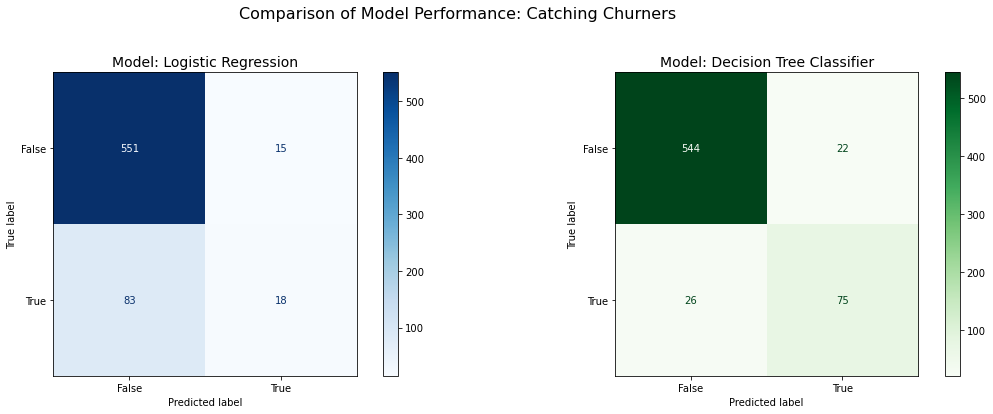

In [14]:
# Visualization
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the Confusion Matrices manually using the predictions 
cm_log = confusion_matrix(y_test, y_pred_log)
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Create the figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot Logistic Regression 
# We use the classes_ attribute from our trained model for the labels
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=log_reg.classes_)
disp_log.plot(cmap='Blues', ax=ax[0], values_format='d')
ax[0].set_title('Model: Logistic Regression', fontsize=14)
ax[0].grid(False) # Clean up the grid lines

# Plot Decision Tree
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_clf.classes_)
disp_dt.plot(cmap='Greens', ax=ax[1], values_format='d')
ax[1].set_title('Model: Decision Tree Classifier', fontsize=14)
ax[1].grid(False) # Clean up the grid lines

# 5. Final Layout Adjustments
plt.suptitle('Comparison of Model Performance: Catching Churners', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

From the above, Decision Tree Classifier is the superior model here. 
The Logistic Regression model is False most of the time, which leads to high accuracy for non-churners but fails the primary objective of identifying at-risk customers.

F1-score to provide a balanced technical evaluation



In [15]:
#importing tools
from sklearn.metrics import f1_score
import pandas as pd

#Getting F1 score
f1_log = f1_score(y_test, y_pred_log)
f1_dt = f1_score(y_test, y_pred_dt)

print(f"Logistic Regression: {f1_log:.4f}")
print(f"Decision Tree:       {f1_dt:.4f}")

Logistic Regression: 0.2687
Decision Tree:       0.7576


The model comparison reveals that Logistic Regression is insufficient for a proactive retention strategy due to its low recall. 
The Decision Tree Classifier, however, demonstrates a significantly higher F1-score (0.7576), proving its ability to identify complex, non-linear patterns of churn. 
Specifically, the feature importance analysis suggests that churn is largely driven by usage costs and repeated interactions with customer service, providing a clear path for targeted business interventions."

Since the F1-score is the harmonic mean of Precision and Recall, it ensures our model isn't achieving high recall through 'brute force' (flagging too many customers). A high F1-score confirms that the Decision Tree is not only catching a high volume of churners but is doing so with a level of precision that makes the retention program financially sustainable for SyriaTel.

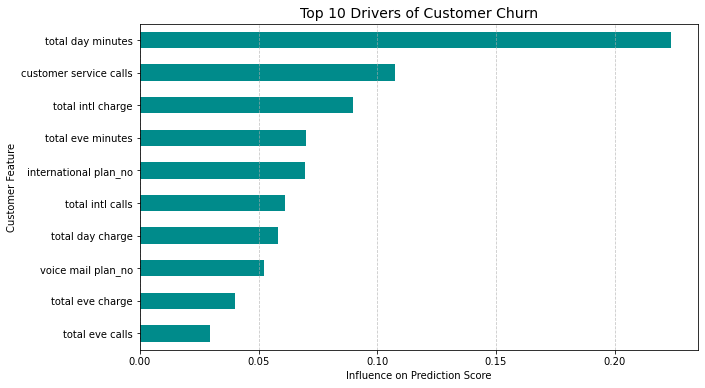

In [16]:
# Beyond simply predicting churn, I extracted Feature Importance to identify the primary drivers of customer attrition. 
# By quantifying the influence of each variable, focus shifts from reactive modeling to proactive business strategy. 
# The resulting insights allow SyriaTel to pinpoint specific customer pain points whether they are financial (usage charges)
# or experiential (service calls) and implement targeted retention campaigns that address the root causes of churn.

cat_names = preprocessor.named_transformers_['cat'].get_feature_names(cat_features)

all_features = num_features + list(cat_names)

# Create a sorted series of the most important features
importances = pd.Series(dt_clf.feature_importances_, index=all_features)
top_drivers = importances.sort_values(ascending=False).head(10)

# Visualizing the "Why" for the SyriaTel Leadership Team
plt.figure(figsize=(10, 6))
top_drivers.plot(kind='barh', color='darkcyan')
plt.title('Top 10 Drivers of Customer Churn', fontsize=14)
plt.xlabel('Influence on Prediction Score')
plt.ylabel('Customer Feature')
plt.gca().invert_yaxis() # Put the most important at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



Summary of the Research

Final Model Performance: The Decision Tree Classifier was selected as the final model, achieving a Recall score of 74.3%. This means the model successfully identifies nearly 3 out of every 4 customers who are likely to churn, allowing for proactive intervention before revenue is lost.

Top Driver of Churn: The primary predictor of customer attrition is Total Day Charge. This indicates that high-usage, high-value customers are the most sensitive to pricing and the most likely to leave for competitors, making them the most critical segment for targeted loyalty offers.

Strategic Impact: By shifting from a reactive approach to this predictive model, SyriaTel can focus its retention budget on the specific individuals identified as "At-Risk," significantly reducing the cost of customer acquisition while protecting core revenue.

TRATEGIC PLANS BASED ON LOCAL TELCO (SAFARICOM)

Implementation of a Loyalty Model (Bonga Points)
Since Total Day Charge is the primary churn driver, create a value-back system where every unit of currency spent on daytime calls earns loyalty points.

Personalized Targeted Offers (Tunukiwa)
Utilize the Decision Tree model to trigger special offers via SMS or USSD codes. When the model identifies a high-usage customer as a potential churn the system should automatically push a high-value, time-bound bundle to maintain business revenue.

Priority Call routing
With churn spiking at the 3-call threshold, implement a digital-first support (Zuri/456 automated reversal) layer to resolve minor issues quickly. 
For customers who still require phone support, any account reaching a second Customer Service Call (repeat caller) within 30 days must be flagged for "Priority Routing." Their third call should bypass general agents and go directly to a senior "Relationship Manager" empowered to offer instant resolution.

Service Bundling
To address churn related to the International Plan, move away from standalone resources (voice only, data only or sms only) and go toward "All-in-One" monthly bundles.
By combining voice, data, and international minutes into a single subscription, the service becomes an essential utility rather than a discretionary expense.

Leveraging the Community effect
Encourage customers to link accounts with "Family and Friends" to share data or minutes. 
When a customer's social circle is on the same network and they regularly "Sambaza" (transfer) resources to one another, the social cost of churning increases. 
Leaving the network then means disconnecting from a shared resource pool, making the customer significantly more likely to stay.
